# GRADIENT BOOSTING CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DIABETICS.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
x1 = df.drop(labels='class', axis=1)
y1 = df.loc[:,'class']

In [9]:
x1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 320, 0: 200})
OVER SAMPLING DATA COUNT  :  Counter({1: 320, 0: 320})


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  512
NUMBER OF TEST DATASET      :  128
TOTAL NUMBER OF DATASET    :  640


In [12]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  512
NUMBER OF TEST DATASET      :  128
TOTAL NUMBER OF DATASET    :  640


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
GRB = GradientBoostingClassifier(random_state=42)
GRB.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [15]:
predicted = GRB.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER:


 [[64  0]
 [ 0 64]]


In [17]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(GRB, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [97.65625 97.65625 99.21875 99.21875 99.21875]


In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF GRADIENT BOOSTING CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF GRADIENT BOOSTING CLASSIFIER IS : 100.0


In [19]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF GRADIENT BOOSTING CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF GRADIENT BOOSTING CLASSIFIER IS : 0.0


In [20]:
from sklearn.metrics import precision_score
P = precision_score(y_test,predicted)
print("THE PRECISION SCORE OF GRADIENT BOOSTING CLASSIFIER IS :",P*100)

THE PRECISION SCORE OF GRADIENT BOOSTING CLASSIFIER IS : 100.0


In [21]:
from sklearn.metrics import recall_score
R = recall_score(y_test,predicted)
print("THE RECALL SCORE OF GRADIENT BOOSTING CLASSIFIER IS :",R*100)

THE RECALL SCORE OF GRADIENT BOOSTING CLASSIFIER IS : 100.0


In [22]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted)
print("THE PRECISION SCORE OF GRADIENT BOOSTING CLASSIFIER IS :",f1*100)

THE PRECISION SCORE OF GRADIENT BOOSTING CLASSIFIER IS : 100.0


THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER:


[[64  0]
 [ 0 64]]


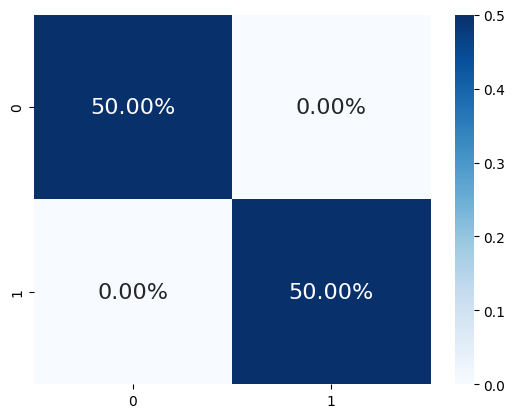

In [23]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

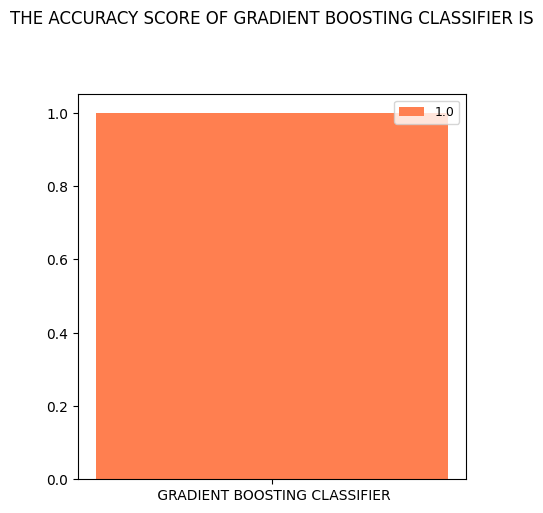

In [24]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg=" GRADIENT BOOSTING CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("coral"))
    plt.title("THE ACCURACY SCORE OF GRADIENT BOOSTING CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [25]:
import joblib
joblib.dump(GRB, 'DIABETICS.pkl')

['DIABETICS.pkl']

In [27]:
joblib.dump(GRB, 'DIABETICS.pkl')

['DIABETICS.pkl']